# Task 1 - Conjugate vs. Jeffreys prior

## Sources

1. EE527:Introduction to Bayesian Inference
https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=fbbd7f280d2dc1e536857212674423b52d8879d1
2. On conjugate families and Jeffreys priors for Mises-Fisher distributions
https://www.sciencedirect.com/science/article/pii/S0378375812003448
3. On the impact of the choice of the prior in Bayesian statistics
file:///Users/stahlma/Downloads/On%20the%20Impact%20of%20the%20Choice%20of%20the%20Prior%20in%20Bayesian%20Statistics%20_%20IntechOpen.pdf
4. Conjugate Priors Represent Strong Pre-Experimental Assumptios
https://people.eecs.berkeley.edu/~jordan/sail/readings/gutierrez-pena-muliere.pdf

## Example

### Secnario
Development of a diagnostic tool that uses patient data to predict the possibility of Type 2 diabetes. The tool uses Bayesian inference to update the probability based on patient characteristics such as age, BMI and blood sugar levels. 

### Steps
1. Define the priors
- Conjugate Prior: 
We assume a beta distribution for the prior probability of diabetes, given its conjugacy with the binomial likelihood of diabetes occurence. 
- Jeffreys Prior: 
We'll use it to asses how non-informative priors influence the posterior in the absence of strong initial beliefs
2. Likelihood:
- We'll consider a simple likelihood function based on the binomial distribution, reflecting the number of positive cases in a sample of patients tested
3. Comput Posterior:
- Calculation and comparison of the posterior distributions derived from the conjugate and Jeffreys priors to show how each impacts the updated disease probability after observing new data. 

In [226]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, norm

In [227]:
# Sample data
n_patients = 100 # Number of patients tested
n_positive = 15 # Number of patients testing positive

In [228]:
# Define parameters for the prior beta distribution (Conjugate Prior)
alpha_prior = 2
beta_prior = 2

# Update the prior with the data
alpha_posterior_conj = alpha_prior + n_positive
beta_posterior_conj = beta_prior + n_patients - n_positive

In [229]:
# Define Jeffreys prior for a binomial distribution (Beta(0.5, 0.5))
alpha_prior_jeff = 0.5
beta_prior_jeff = 0.5

# Update the Jeffreys prior with the data
alpha_posterior_jeff = alpha_prior_jeff + n_positive
beta_posterior_jeff = beta_prior_jeff + n_patients - n_positive

In [230]:
# Calculate the posterior distributions
x = np.linspace(0, 1, 1000)
posterior_conj = beta.pdf(x, alpha_posterior_conj, beta_posterior_conj)
posterior_jeff = beta.pdf(x, alpha_posterior_jeff, beta_posterior_jeff)

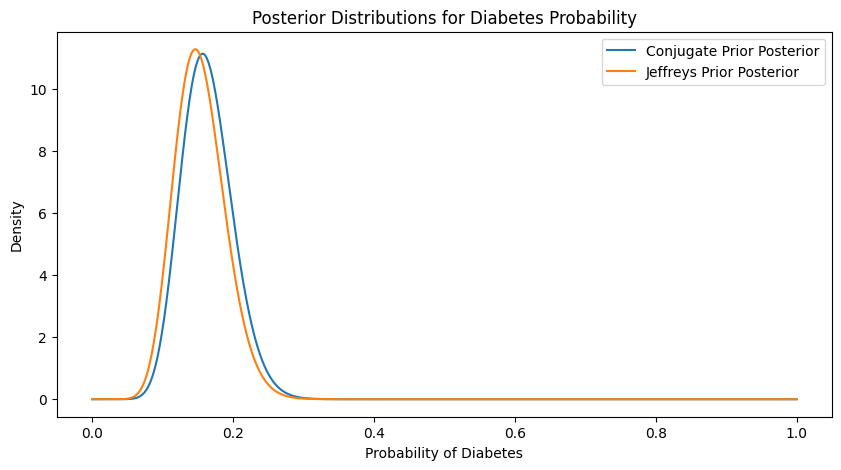

In [231]:
# Plot the results
plt.figure(figsize=(10, 5)) 
plt.plot(x, posterior_conj, label='Conjugate Prior Posterior')
plt.plot(x, posterior_jeff, label='Jeffreys Prior Posterior')
plt.title('Posterior Distributions for Diabetes Probability')
plt.xlabel('Probability of Diabetes')
plt.ylabel('Density')
plt.legend()
plt.show()

## Results
We can see that both priors calculate almost the same result. The Jeffreys prior is just a little more skewed to the left than the Conjugate prior, and a tiny bit more narrow. In this case we chose a fairly uniform conjugate prior, looking at a less uniform prior should alter the results. 
Changing alpha and beta would mean, to include more prior information into the model. This information might be available to us through expert knwoledge on the domain, or through previous projects that lead us to certain beliefs.

## Showcasing different alpha and beta conjugate prior values in the context of differntly sized datasets
alpha = 2, 5
beta =  2, 1
datasize = 10, 500

To make the examples comparable we will stay with the assumptions made above -> 15% of patients test positive

In [232]:
alpha_values = [2, 5 ]
beta_values = [2, 1]
datasizes = [10, 500]

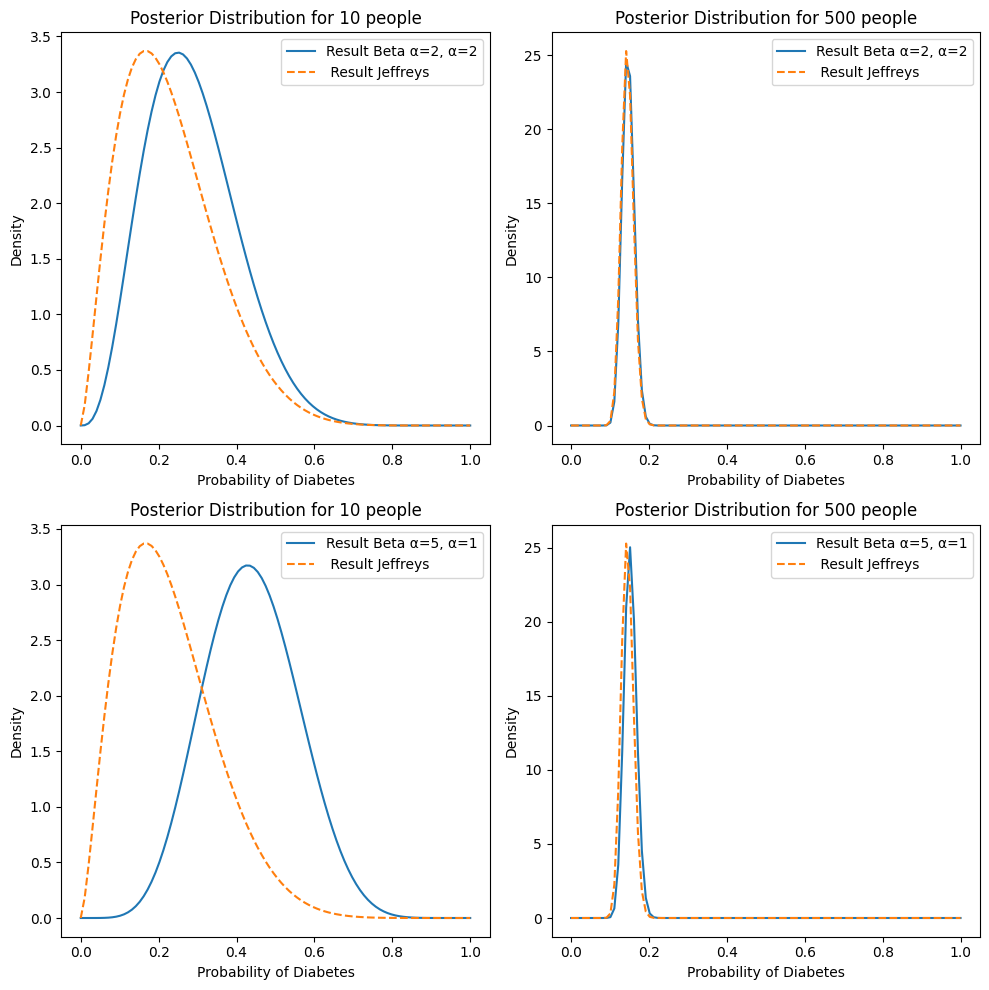

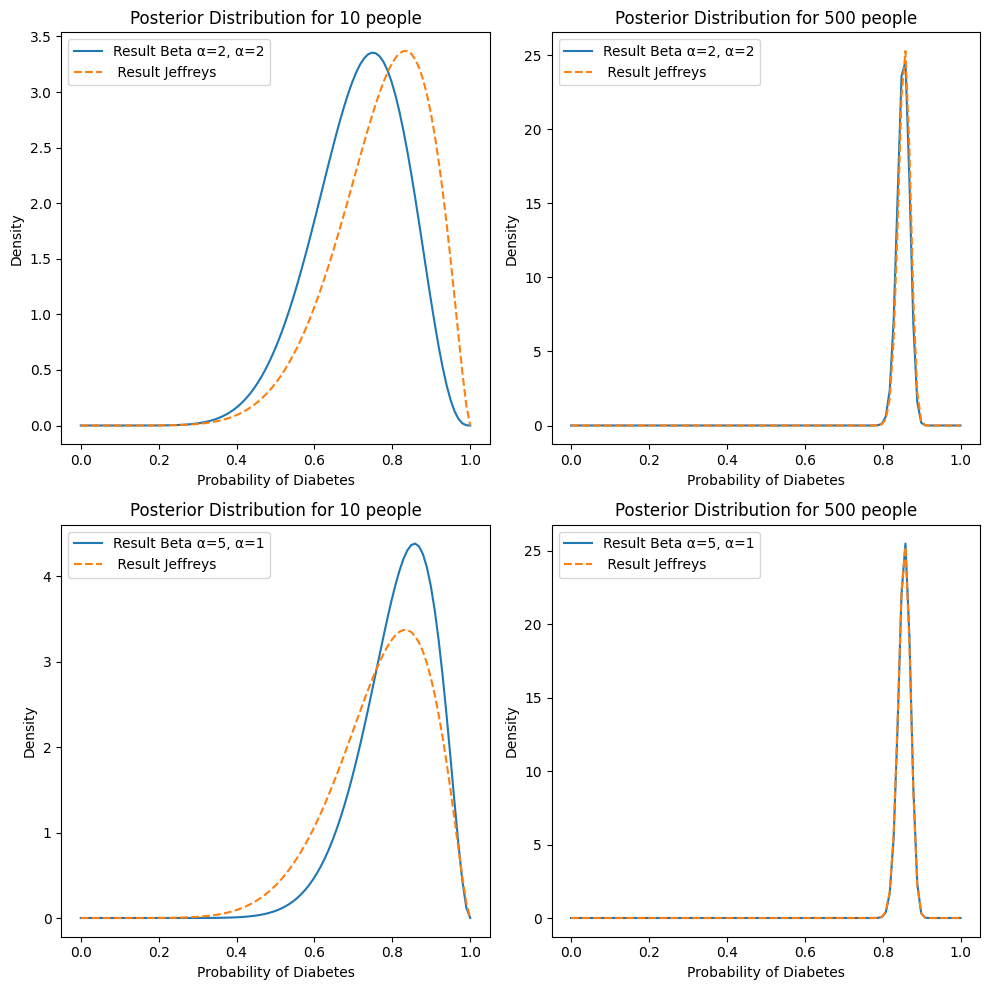

In [233]:
def plot_posteriors(alpha_values, beta_values, datasizes, probability=0.15):
    num_rows = len(alpha_values)
    num_cols = len(datasizes)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
                           
    for i, (alpha_input, beta_input) in enumerate(zip(alpha_values, beta_values)):
        for j, n in enumerate(datasizes):
            np.random.seed(73)
            data = binom.rvs(n=n, p=probability, size=1)
            alpha_post = alpha_input + data
            beta_post = beta_input + n - data
            alpha_post_jeffreys = 0.5 + data
            beta_post_jeffreys = 0.5 + n - data

            x = np.linspace(0, 1, 100)
            posterior = beta.pdf(x, alpha_post, beta_post)
            posterior_jeffreys = beta.pdf(x, alpha_post_jeffreys, beta_post_jeffreys)

            if num_rows == 1 or num_cols == 1:
                ax = axs[max(i,j)]
            else:
                ax = axs[i, j]
          
            ax.plot(x, posterior, label=f'Result Beta α={alpha_input}, α={beta_input}')
            ax.plot(x, posterior_jeffreys, label=f' Result Jeffreys', linestyle='--')
            ax.set_title(f'Posterior Distribution for {n} people')
            ax.set_xlabel('Probability of Diabetes')
            ax.set_ylabel('Density')
            ax.legend()
    plt.tight_layout()
    plt.show()

plot_posteriors(alpha_values, beta_values, datasizes)

# Changing the true probability to 85% to observe the behavior of the posteriors
plot_posteriors(alpha_values, beta_values, datasizes, probability=0.85)

## Results
* We can observe that the prior plays a major role when the data is scarce. In very small datasets we have a wide margin of probabilitys by each of the calculated posterior distributions. 
* The conjugate priorhinges on the selection of alpha and beta values, a relatively larger alpha moves the distributions peak to the right, while a relatively larger beta moves it to the left.We can also observe that if alpha and beta are the same but of a larger value (10 instead of 2) the distributions peak will also be moved further towards the center.
* The Jeffreys prior distribution becomes narrower (more certain) with more datapoints available, and it is able to capture the true data distribution better with few datapoints available than a non informative conjugate prior ( alpha and beta = 2) 
In general we can take from the data above that the larger the dataset gets the less important the prior gets (let the data speak for itself). If the dataset is sufficiently large the jeffreys and conjugate prior calculations for the posterior distrbution will render the same result. 

## Looking at a normal distribution with known variance
### Scenario
We are examining the effect of a new drug on reducing blood pressure, where the blood pressure readings follow a normal distribution. We also know the variance from earlier studies. Our goal is to estimate the mean effect of the drug. 

### Steps
1. Define Prior:
- Normal Prior for the mean
- Conjugate: We will specify different means and precisions (inverse of variance)
- Jeffreys: Proprer non informative prior with large variance
2. Likelihood:
- Normal likelihood
3. Posterior calculation

In [234]:
# Define known variance of blood pressure readings
known_variance = 25 # We know that the variance is 5 squared (just an example)

# Define the true mean effect of the drug (only for simulation purposes)
true_mean_effect = 5

# Simulate the blood pressure readings
np.random.seed(73)
sample_sizes = [10, 100, 500]
sample_data = {n: np.random.normal(true_mean_effect, np.sqrt(known_variance), n) for n in sample_sizes}

In [235]:
# Define prior mean and precision for conjugate normal prior
prior_means = [4, -4, 15]
prior_precisions = [0.2, 0.2, 0.6] # Larger precision means more confidence in the prior

# Define a large variance for the non-informative prior to simulate Jeffreys prior
non_informative_variance = 1e6

In [236]:
def calculate_normal_posterior(sample, prior_mean, prior_precision, known_variance):
    n = len(sample)
    sample_mean = np.mean(sample)

    posterior_precision = prior_precision + n / known_variance
    posterior_mean = (prior_precision * prior_mean + n * sample_mean/ known_variance) / posterior_precision

    posterior_variance = 1 / posterior_precision

    return posterior_mean, posterior_variance

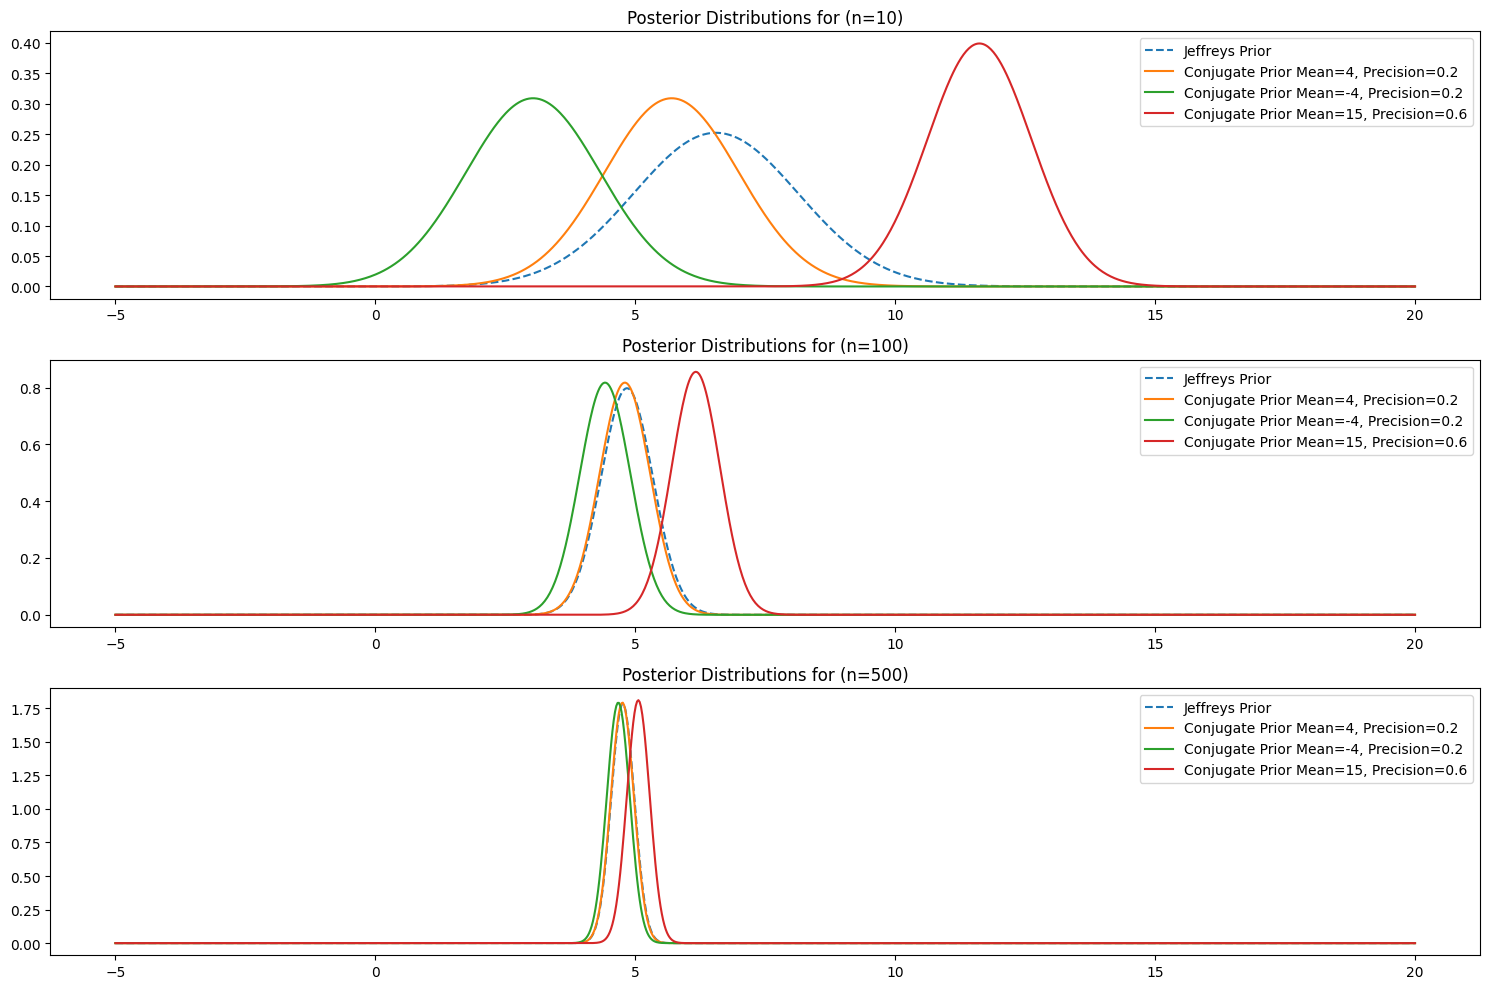

In [237]:
# Plot the results
plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    plt.subplot(len(sample_sizes), 1 , i + 1)

    non_info_post_mean, non_info_post_variance = calculate_normal_posterior(sample_data[n], 0, 1/non_informative_variance, known_variance)

    x = np.linspace(-5, 20, 1000)
    plt.plot(x, norm.pdf(x, non_info_post_mean, np.sqrt(non_info_post_variance)), label='Jeffreys Prior', linestyle='--')

    for prior_mean, prior_precision in zip(prior_means, prior_precisions):
        post_mean, post_variance = calculate_normal_posterior(sample_data[n], prior_mean, prior_precision, known_variance)

        plt.plot(x, norm.pdf(x, post_mean, np.sqrt(post_variance)), label=f'Conjugate Prior Mean={prior_mean}, Precision={prior_precision}')
    
    plt.title(f'Posterior Distributions for (n={n})')
    plt.legend()

plt.tight_layout()
plt.show()

## Results
* High Precision Conjugate -> High confidence in the prior knowledge. The prior knowledge plays a larger role in the posterior calculation. If the prior knwoledge (mean) is selected based on sound knowledge the posterior will qucikly converge. If the prior knowledge is choosen poorly it will negatively affect convergence.
* Low Precision Conjugate -> Low confidence in prior knowledge, the data will play a larger role and even a poorly choosen prior will converge on the true distribution relatively quick. 
* Jeffreys (not true in this example only simulated) -> Converges fast and even grasps the data well on small datasets. However, the uncertainty is fairly large on small datasets.

- As the sample size increases the influence of the prior decreases
- A high precision prior converges to an accurate estimate more quickly than a low precision prior, but only if the prior mean is close to the true mean
- The choice of the prior should be based on how confident we are in out prior information and its accuracy.

## Outline
1. Introduction to Bayesian Statistics
- Overview of Bayesian and the importance of priors in Bayesian statistics
2. Conjugate Priors
- Definition and examples
- Advantages
- Limitations
3. Jeffreys Priors
- Definition
- Advantages
- Limitations
4. Comparison
- Computational ease
- Outcomes of posterior distribution -> interpretability
- Differences in application scenarios -> when to prefer which
5. Real world scenario
- Hypothetical scenario (medicine) definition
- Illustrations and description of calculating each prior in this scenario
- Discussion of practical consequences of choosing each prior in this scenario
6. Conclusion
- Key points
- Importance of careful prior selection